In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests

In [379]:
# Options
pd.set_option('max_colwidth', 500)


In [380]:
df = pd.read_csv('./data/transactions.csv', low_memory=False)

df.head()


,block_time,block_number,hash,value,tx_fee,nonce,from,to,method_id,sender,receiver,project,token_bought_symbol,token_sold_symbol,token_bought_amount,token_sold_amount,amount_usd,taker,tx_from,tx_to
0,2023-04-14 14:51:35.000 UTC,17046105.0,0x2afae7763487e60b893cb57803694810e6d3d136186a6de6719921afd7ca304a,0,0.037013,0.0,0xfbfeaf0da0f2fde5c66df570133ae35f3eb58c9a,NaN,0x60806040,0x0000000000000000000000000000000000000000,0xfbfeaf0da0f2fde5c66df570133ae35f3eb58c9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-14 16:20:47.000 UTC,17046538.0,0xb38bba8bf8f61029a31e027c37fbc1065db784a39501d456a05cc490db5b4578,0,0.001861,3.0,0xfbfeaf0da0f2fde5c66df570133ae35f3eb58c9a,0x6982508145454ce325ddbe47a25d4ec3d2311933,0xa9059cbb,0xfbfeaf0da0f2fde5c66df570133ae35f3eb58c9a,0x92fb5b4f8030103e0b11275c30965d1897ff23e5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-14 17:21:11.000 UTC,17046833.0,0x273894b35d8c30d32e1ffa22ee6aa320cc9f55f2adbba0583594ed47c031f6f6,2000000000000000000,0.077539,4.0,0xfbfeaf0da0f2fde5c66df570133ae35f3eb58c9a,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xf305d719,0xfbfeaf0da0f2fde5c66df570133ae35f3eb58c9a,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-14 17:34:47.000 UTC,17046900.0,0xc3760b499850b19d8f266dc10349d70f69c91698233697cbad2ee90ff957ed17,1000000000000000,0.004451,5.0,0xfbfeaf0da0f2fde5c66df570133ae35f3eb58c9a,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0x3593564c,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xfbfeaf0da0f2fde5c66df570133ae35f3eb58c9a,uniswap-2,PEPE,WETH,1.951464e+11,0.001,2.079390,0xfbfeaf0da0f2fde5c66df570133ae35f3eb58c9a,0xfbfeaf0da0f2fde5c66df570133ae35f3eb58c9a,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b
4,2023-04-14 19:46:59.000 UTC,17047545.0,0x08153c0546e4f73b178edae90d1e30fb519c7c49ff0dcd00e4b0bcd74dab468c,13000034453500519,0.009752,12056.0,0xaf2358e98683265cbd3a48509123d390ddf54534,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7ff36ab5,0xa43fe16908251ee70ef74718545e4fe6c5ccec9f,0xaf2358e98683265cbd3a48509123d390ddf54534,uniswap-2,PEPE,WETH,2.519324e+12,0.013,27.131592,0xaf2358e98683265cbd3a48509123d390ddf54534,0xaf2358e98683265cbd3a48509123d390ddf54534,0x7a250d5630b4cf539739df2c5dacb4c659f2488d


In [381]:
# Helper Functions
def fetch_token_price(token_symbol):
  api = 'https://min-api.cryptocompare.com/data/price'
  res = requests.get('{}?fsym={}&tsyms=USD'.format(api, token_symbol)).json()
  if 'USD' in res:
    return res['USD']
  else:
    return 0

def fetch_text_signature(hex_signature):
  if len(hex_signature) != 10:
    return ''
  
  api = 'https://www.4byte.directory/api/v1/signatures'
  res = requests.get('{}/?hex_signature={}'.format(api, hex_signature)).json()
  
  if res['count'] == 0:
    return ''
  
  return res['results'][len(res['results']) - 1]['text_signature']


In [382]:
# Overview
start_time = df['block_time'].iloc[0]
end_time = df['block_time'].iloc[-1]
start_block = int(df['block_number'].iloc[0])
end_block = int(df['block_number'].iloc[-1])
total_transasctions = df['hash'].unique().size
total_wallet = df['from'].unique().size
total_eth_paid = round(df['tx_fee'].sum(), 2)
current_eth_price = fetch_token_price('ETH')
total_trading_volume = round(df['amount_usd'].sum())

print('Overview:')
print('Time: {} to {}'.format(start_time, end_time))
print('Block: {} to {} ~{} blocks'.format(start_block, end_block, end_block - start_block))
print('Total transasctions: {:,} transactions'.format(total_transasctions))
print('Total unique user: {:,} users'.format(total_wallet))
print('Total fee paid: {:,} ETH ~${:,}'.format(total_eth_paid, round(total_eth_paid * current_eth_price)))
print('Total trading volume: ${:,}'.format(total_trading_volume))


Overview:
Time: 2023-04-14 14:51:35.000 UTC to 2023-05-05 18:06:23.000 UTC
Block: 17046105 to 17196108 ~150003 blocks
Total transasctions: 539,497 transactions
Total unique user: 129,047 users
Total fee paid: 12,468.94 ETH ~$22,414,665
Total trading volume: $2,939,838,678


In [383]:
# Wallet with the first swap transaction
minimum_nonce = 0
df = df.drop_duplicates(['hash']) #TODO:
df_fresh_nonce = df[
  (df['nonce'] <= minimum_nonce)
  & (df['project'].notnull())
  & (df['token_bought_symbol'] == 'PEPE')
]
number_of_fresh_wallet = df_fresh_nonce['from'].unique().size

print('{:,} fresh wallets '.format(number_of_fresh_wallet))

# TODO: fresh wallet when liquidity was added


19,770 fresh wallets 


        method_id  number_call       method_text
4136   0x3593564c       262524           execute
5527   0x5f575529        63801              swap
8299   0xa9059cbb        56376          transfer
5374   0x5ae401dc        15403         multicall
2237   0x04e45aaf        11474  exactInputSingle
8590   0xac9650d8        10929         multicall
5440   0x5cf54026         8909       proxiedSwap
10150  0xe21fd0e9         7513              swap
2260   0x0502b1c5         4164           unoswap
6923   0x8af033fb         3355    swapSimpleMode


<Axes: title={'center': 'Number of calls by Method'}, xlabel='Method', ylabel='Number of calls'>

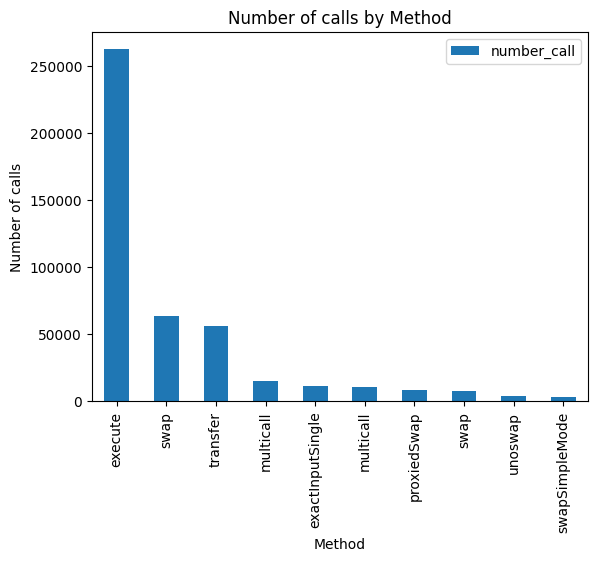

In [384]:
# Count method id
def get_text_signature(method_id):
  text = fetch_text_signature(method_id)
  text = text.split('(')[0]
  return text

df_methods = df.groupby(['method_id'])['method_id'] \
  .count() \
  .reset_index(name='number_call') \
  .sort_values(['number_call'], ascending=False) \
  .head(10)

df_methods['method_text'] = df_methods.apply(lambda x: get_text_signature(x['method_id']), axis=1)

print(df_methods)
df_methods.plot(
  kind='bar',
  title='Number of calls by Method',
  x='method_text',
  y='number_call',
  xlabel='Method',
  ylabel='Number of calls'
)


In [385]:
# Format block time
columns = [
  'block_time',
  'hash',
  'project',
  'token_bought_symbol',
  'token_sold_symbol',
  'token_bought_amount',
  'token_sold_amount',
  'amount_usd'
]
df_with_floor_time_by_hour = df.loc[:, columns]
df_with_floor_time_by_hour['block_time'] = pd \
  .to_datetime(df_with_floor_time_by_hour['block_time']) \
  .dt.floor('H') \
  .dt.strftime('%Y-%m-%d %H:%M:%S')

df_with_floor_time_by_day = df_with_floor_time_by_hour.loc[:]
df_with_floor_time_by_day['block_time'] = pd \
  .to_datetime(df_with_floor_time_by_day['block_time']) \
  .dt.floor('D') \
  .dt.strftime('%Y-%m-%d')


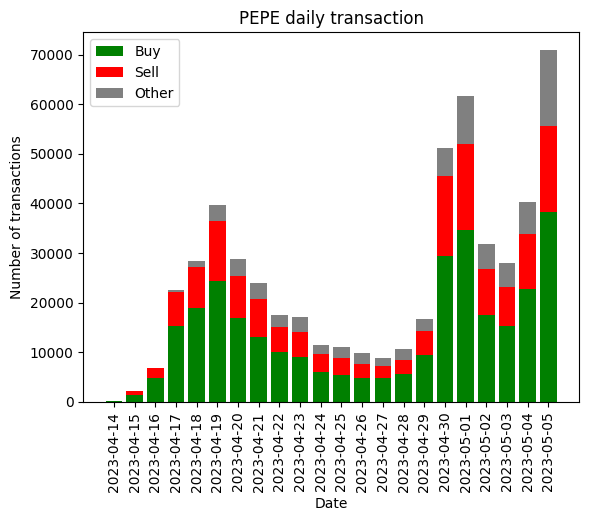

In [386]:
# Daily transaction
def get_other_count(row):
  return row['total_tx_count'] - row['tx_buy_count'] - row['tx_sell_count']

df_tx = df_with_floor_time_by_day.drop_duplicates(['hash'])
df_tx_count = df_tx \
  .groupby('block_time')['hash'] \
  .count() \
  .reset_index(name='total_tx_count')

df_swap_only = df_tx[df_tx['project'].notna()]
df_buy_count = df_swap_only \
  .groupby('block_time')['token_bought_symbol'] \
  .apply(lambda x: (x == 'PEPE').sum()) \
  .reset_index(name='tx_buy_count')

df_sell_count = df_swap_only \
  .groupby('block_time')['token_sold_symbol'] \
  .apply(lambda x: (x == 'PEPE').sum()) \
  .reset_index(name='tx_sell_count')

df_counter = df_tx_count.merge(
  df_buy_count.merge(df_sell_count, how='inner', on='block_time'),
  how='inner',
  on='block_time'
)

df_counter = df_counter.assign(tx_other_count = lambda x: get_other_count(x))

# Draw bar chart
_, ax = plt.subplots()
ax.bar(df_counter['block_time'], df_counter['tx_buy_count'], color='g')
ax.bar(df_counter['block_time'], df_counter['tx_sell_count'], bottom=df_counter['tx_buy_count'], color='r')
ax.bar(df_counter['block_time'], df_counter['tx_other_count'], bottom=df_counter['tx_buy_count'] + df_counter['tx_sell_count'], color='gray')

ax.set_xlabel('Date')
ax.set_ylabel('Number of transactions')
ax.set_title('PEPE daily transaction')
ax.legend(['Buy', 'Sell', 'Other'])

plt.xticks(rotation=90)

plt.show()

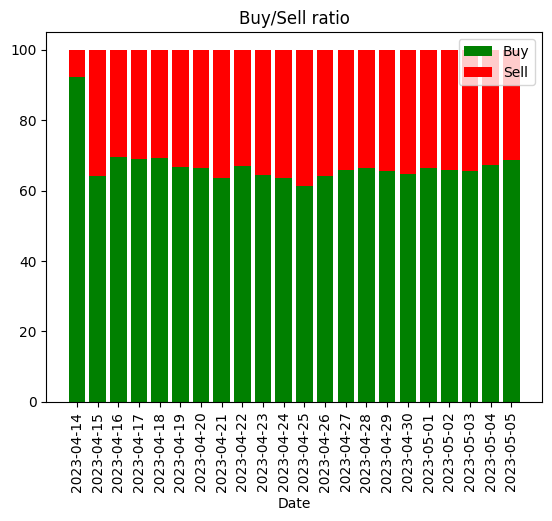

In [387]:
# Ratio of buy and sell
def get_buy_percentage(row):
  return round((row['tx_buy_count'] / (row['tx_buy_count'] + row['tx_sell_count'])) * 100, 2)

df_swap_ratio = df_counter[['block_time', 'tx_buy_count', 'tx_sell_count']]
df_swap_ratio = df_swap_ratio.assign(buy_percentage = lambda x: get_buy_percentage(x))
df_swap_ratio = df_swap_ratio.assign(sell_percentage = lambda x: 100 - x['buy_percentage'])

_, ax = plt.subplots()
ax.bar(df_swap_ratio['block_time'], df_swap_ratio['buy_percentage'], color='g')
ax.bar(df_swap_ratio['block_time'], df_swap_ratio['sell_percentage'], bottom=df_swap_ratio['buy_percentage'], color='r')

ax.set_xlabel('Date')
ax.set_title('Buy/Sell ratio')
ax.legend(['Buy', 'Sell'])

plt.xticks(rotation=90)
plt.show()



Number of transactions: 539,497 transactions
Number of swap transactions: 462,879 transactions
Swap ratio: 85.8%


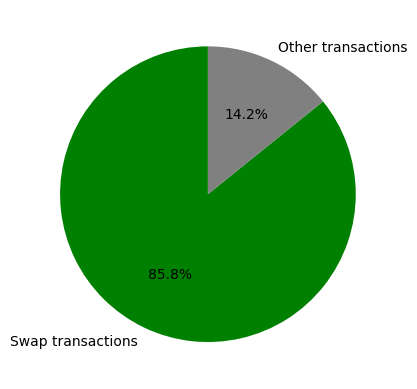

In [388]:
# Swap rate
df_unique_hash = df.drop_duplicates(['hash'])
number_of_txs = len(df_unique_hash)
number_of_swap_txs = len(df_unique_hash[df_unique_hash['project'].notna()])

swap_rate = round((number_of_swap_txs / number_of_txs) * 100, 2)

print('Number of transactions: {:,} transactions'.format(number_of_txs))
print('Number of swap transactions: {:,} transactions'.format(number_of_swap_txs))
print('Swap ratio: {}%'.format(swap_rate))

plt.pie(
  [swap_rate, 100 - swap_rate],
  labels=['Swap transactions', 'Other transactions'],
  colors=['green', 'gray'],
  startangle = 90,
  autopct='%1.1f%%'
)
plt.show()

<Axes: title={'center': 'PEPE Daily Volume'}, xlabel='Block time', ylabel='Volume USD'>

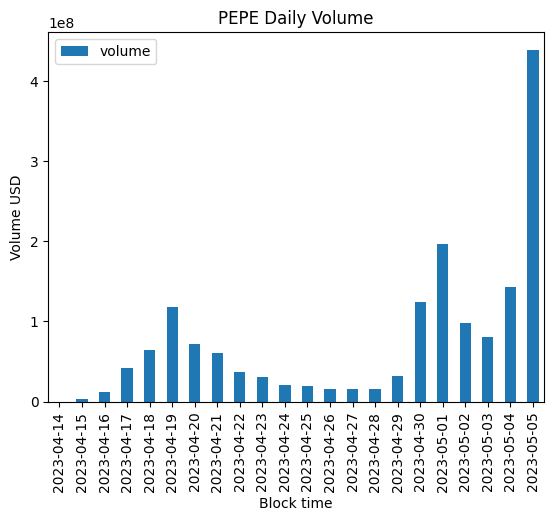

In [389]:
# Daily and cummulative volume
df_swaps = df_with_floor_time_by_day[df_with_floor_time_by_day['project'].notna()]
df_volume = df_swaps \
  .groupby('block_time')['amount_usd'] \
  .sum() \
  .reset_index(name='volume')

df_volume['cummulative_volume'] = df_volume['volume'] \
  .cumsum()

df_volume.plot(
  kind='bar',
  title='PEPE Daily Volume',
  x='block_time',
  y='volume',
  xlabel='Block time',
  ylabel='Volume USD'
)

         project  total_volume
3      uniswap-2  9.820401e+08
4      uniswap-3  6.580576e+08
2  pancakeswap-3  1.878048e+06
0         DODO-0  3.120346e+05
1     maverick-1  1.169335e+05


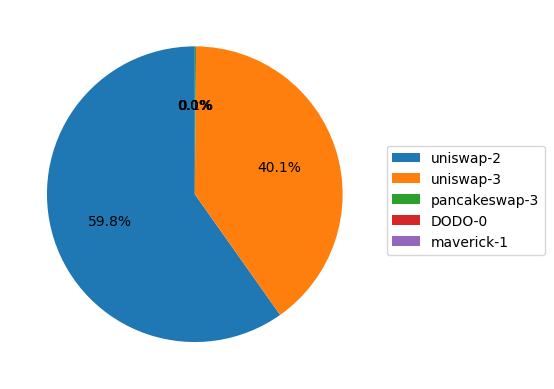

In [390]:
# Market share
df_market_share = df_swaps \
  .groupby('project')['amount_usd'] \
  .sum() \
  .reset_index(name='total_volume') \
  .sort_values(by=['total_volume'], ascending=False)

print(df_market_share)

plt.pie(
  df_market_share['total_volume'],
  startangle = 90,
  autopct='%1.1f%%'
)
plt.legend(labels=df_market_share['project'], bbox_to_anchor=(1, 0.65))
plt.show()

Text(1, 40, 'ROI 380,741x')

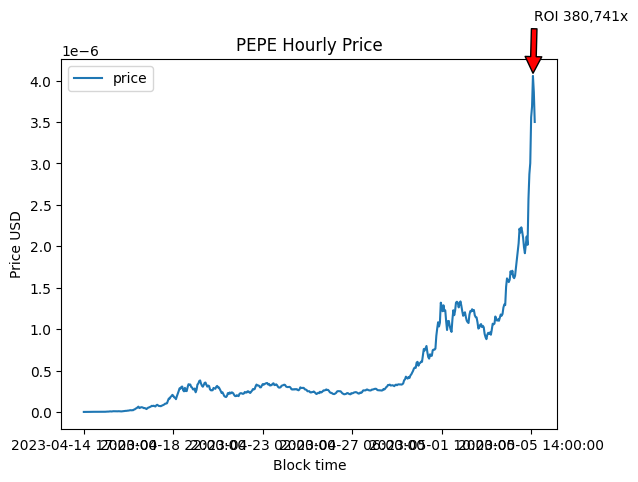

In [391]:
# Hourly price
df_price = df_with_floor_time_by_hour[df_with_floor_time_by_hour['project'].notna()] \
  .assign(price = lambda x:
    x['amount_usd'] / df.apply(
    lambda x: x['token_bought_amount']
      if x['token_bought_symbol'] == 'PEPE'
      else x['token_sold_amount']
    , axis=1
))

df_price = df_price.groupby('block_time')['price'].mean().reset_index()

init_price = df_price['price'].iloc[0]
highest_price = df_price['price'].max()
highest_price_index = df_price['price'].idxmax()
roi = round(highest_price / init_price)

# Draw figure
fig_price = df_price.plot(
  kind='line',
  title='PEPE Hourly Price',
  x='block_time',
  y='price',
  xlabel='Block time',
  ylabel='Price USD'
)
fig_price.annotate(
  'ROI {:,}x'.format(roi),
  xy=(highest_price_index, highest_price),
  xycoords='data',
  xytext=(1, 40),
  textcoords='offset points',
  arrowprops=dict(facecolor='red', shrink=0.05),
)


In [392]:
# Address by volume
def get_number_of_address_by_volume(min, max):
  return len(df_address_volume[
    (df_address_volume['total_volume'] > min)
    & (df_address_volume['total_volume'] <= max)
  ])

df_address_volume = df[df['project'].notna()]

df_address_volume = df_address_volume \
  .groupby('tx_from')['amount_usd'] \
  .sum() \
  .reset_index(name='total_volume') \
  .sort_values(by=['total_volume'], ascending=False) 

for i in range(4):
  min = pow(10, 0 if i == 0 else i + 2)
  max = pow(10, i + 3)
  num_address = get_number_of_address_by_volume(min, max)
  ratio = round((num_address / len(df_address_volume)) * 100, 2)
  print('Number of address with volume (${:,}-${:,}]: {:,} addresses ({}%)'
    .format(min, max, num_address, ratio)
  )

print('\n')
print('Top 10 address with highest trading volume:')
df_address_volume \
    .rename(columns={'tx_from': 'Address', 'total_volume': 'Volume ($)'}) \
    .reset_index(drop=True) \
    .head(10) \
    .style.format({'Volume ($)': '${:,.0f}'})

Number of address with volume ($1-$1,000]: 77,791 addresses (65.04%)
Number of address with volume ($1,000-$10,000]: 30,846 addresses (25.79%)
Number of address with volume ($10,000-$100,000]: 9,063 addresses (7.58%)
Number of address with volume ($100,000-$1,000,000]: 1,431 addresses (1.2%)


Top 10 address with highest trading volume:


,Address,Volume ($)
0,0xae2fc483527b8ef99eb5d9b44875f005ba1fae13,"$429,820,523"
1,0x758e8229dd38cf11fa9e7c0d5f790b4ca16b3b16,"$42,630,666"
2,0xb58555fcba6479fced7de1485eb054943a09af7b,"$31,306,705"
3,0xd985c35f566c9de55df16ade36852b0c40f4bf59,"$24,442,554"
4,0x85b4ad5f4f563e549a33d5b0b23c1091aa03d2ac,"$22,096,868"
5,0xf1d307906edc902dc2c392af2880f43a55d3583a,"$20,068,704"
6,0xa009fa1ac416ec02f6f902a3a4a584b092ae6123,"$17,225,437"
7,0xb722e4d12d4c0ec0309856e32c4f7df9c05a11fb,"$15,950,469"
8,0x33c6b73432b3aea0c1725e415cc40d04908b85fd,"$15,814,872"
9,0x76f36d497b51e48a288f03b4c1d7461e92247d5e,"$14,691,030"
